In [24]:
print("Naive Bayes")

Naive Bayes


In [36]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [37]:
# Load your dataset
data = pd.read_csv("emails.csv")


In [38]:
# Check for any null values and handle them if necessary
data.dropna(inplace=True)

In [39]:
print("Sample of the dataset:")
print(data.head())

Sample of the dataset:
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [40]:
# Extract features and labels
X = data['text']
y = data['spam']

In [41]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [42]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [43]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [44]:
# Initialize the Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = nb_model.predict(X_test_tfidf)

In [45]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


In [46]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8926701570680629
Classification Report:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93       856
           1       1.00      0.58      0.73       290

    accuracy                           0.89      1146
   macro avg       0.94      0.79      0.83      1146
weighted avg       0.91      0.89      0.88      1146



In [88]:
import pandas as pd
import pickle

In [89]:
with open('test_data.txt', 'r') as file:
    test_data = file.readlines()

# Remove newline characters from the end of each line
test_data = [email.strip() for email in test_data]


In [90]:
# Vectorize the test data using the TF-IDF vectorizer used for training
X_test_tfidf = vectorizer.transform(test_data)

# Make predictions on the test data
predictions = nb_model.predict(X_test_tfidf)

# Create a DataFrame to display the predictions
results_df = pd.DataFrame({
    'Email': test_data,
    'Prediction': ['SPAM' if pred == 1 else 'NOT SPAM' for pred in predictions]
})

# Display the DataFrame
print(results_df)

                                                 Email Prediction
0    "Hey there, I wanted to let you know about thi...   NOT SPAM
1    "Congratulations! You've won a free vacation. ...   NOT SPAM
2    "Reminder: Your appointment is scheduled for t...   NOT SPAM
3    "Please review the attached document and provi...   NOT SPAM
4    "URGENT: Your account has been compromised. Cl...       SPAM
..                                                 ...        ...
100  "Unlock the secrets of success with our motiva...   NOT SPAM
101  "Elevate your dining experience with our gourm...   NOT SPAM
102  "Stay informed and entertained with our curate...   NOT SPAM
103  "Transform your backyard into an oasis with ou...   NOT SPAM
104  "Join the movement! Learn about sustainability...   NOT SPAM

[105 rows x 2 columns]


In [47]:
print("SVM")

SVM


In [48]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [49]:
# Check for any null values and handle them if necessary
data.dropna(inplace=True)

In [50]:
print("Sample of the dataset:")
print(data.head())

Sample of the dataset:
                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


In [51]:
# Extract features and labels
X = data['text']
y = data['spam']

In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [54]:
# Initialize the SVM model
svm_model = SVC(kernel='linear', C=1.0, random_state=42)

# Train the model
svm_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_tfidf)

In [55]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)



In [56]:
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)

Accuracy: 0.9921465968586387
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       856
           1       0.99      0.98      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



In [76]:
print("Random Forest")

Random Forest


In [57]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_rep_rf = classification_report(y_test, y_pred_rf)

print(f'Accuracy for Random Forest: {accuracy_rf}')
print('Classification Report for Random Forest:')
print(classification_rep_rf)


Accuracy for Random Forest: 0.9755671902268761
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       856
           1       1.00      0.90      0.95       290

    accuracy                           0.98      1146
   macro avg       0.98      0.95      0.97      1146
weighted avg       0.98      0.98      0.98      1146



In [59]:
print("Gradient Booster")

Gradient Booster


In [58]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the model
gb_model.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_tfidf)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
classification_rep_gb = classification_report(y_test, y_pred_gb)

print(f'Accuracy for Gradient Boosting: {accuracy_gb}')
print('Classification Report for Gradient Boosting:')
print(classification_rep_gb)


Accuracy for Gradient Boosting: 0.9572425828970331
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       856
           1       0.98      0.85      0.91       290

    accuracy                           0.96      1146
   macro avg       0.96      0.92      0.94      1146
weighted avg       0.96      0.96      0.96      1146



In [66]:
print("CNN")

CNN


In [60]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout


In [61]:
# Extract features and labels
X = data['text']
y = data['spam']

In [62]:
# Tokenizer parameters
max_words = 5000  # Maximum number of words to keep, based on word frequency
max_len = 500  # Maximum length of sequences (number of words)

# Initialize the Tokenizer
tokenizer = Tokenizer(num_words=max_words, lower=True)
tokenizer.fit_on_texts(X.values)  # Fit the tokenizer on the texts


In [63]:
# Convert texts to sequences of integers
X = tokenizer.texts_to_sequences(X.values)

# Pad sequences to ensure they are all the same length
X = pad_sequences(X, maxlen=max_len)


In [64]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# CNN model parameters
embedding_dim = 100  # Dimension of the dense embedding
num_filters = 128  # Number of filters in the convolutional layer
kernel_size = 5  # Size of the convolutional filters


In [67]:
# Build the CNN model
model = Sequential()
# Add an embedding layer to convert integer sequences into dense vectors of fixed size
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
# Add a 1D convolutional layer with ReLU activation
model.add(Conv1D(num_filters, kernel_size, activation='relu'))
# Add a global max pooling layer to reduce the spatial dimensions of the output
model.add(GlobalMaxPooling1D())
# Add a dropout layer for regularization
model.add(Dropout(0.5))
# Add a dense layer with a single unit and sigmoid activation function for binary classification
model.add(Dense(1, activation='sigmoid'))

/opt/homebrew/Cellar/jupyterlab/4.1.6/libexec/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [68]:
# Compile the model with binary cross-entropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [69]:
# Train the model
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test), verbose=2)

Epoch 1/5
72/72 - 5s - 64ms/step - accuracy: 0.7988 - loss: 0.3955 - val_accuracy: 0.9695 - val_loss: 0.1713
Epoch 2/5
72/72 - 4s - 56ms/step - accuracy: 0.9745 - loss: 0.0977 - val_accuracy: 0.9817 - val_loss: 0.0598
Epoch 3/5
72/72 - 4s - 56ms/step - accuracy: 0.9926 - loss: 0.0328 - val_accuracy: 0.9869 - val_loss: 0.0379
Epoch 4/5
72/72 - 4s - 59ms/step - accuracy: 0.9978 - loss: 0.0134 - val_accuracy: 0.9887 - val_loss: 0.0307
Epoch 5/5
72/72 - 4s - 58ms/step - accuracy: 0.9980 - loss: 0.0081 - val_accuracy: 0.9895 - val_loss: 0.0301


In [71]:
# Make predictions
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate F1-score
f1 = f1_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [73]:
# Print results
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 0.9895287958115183
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       856
           1       0.98      0.98      0.98       290

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



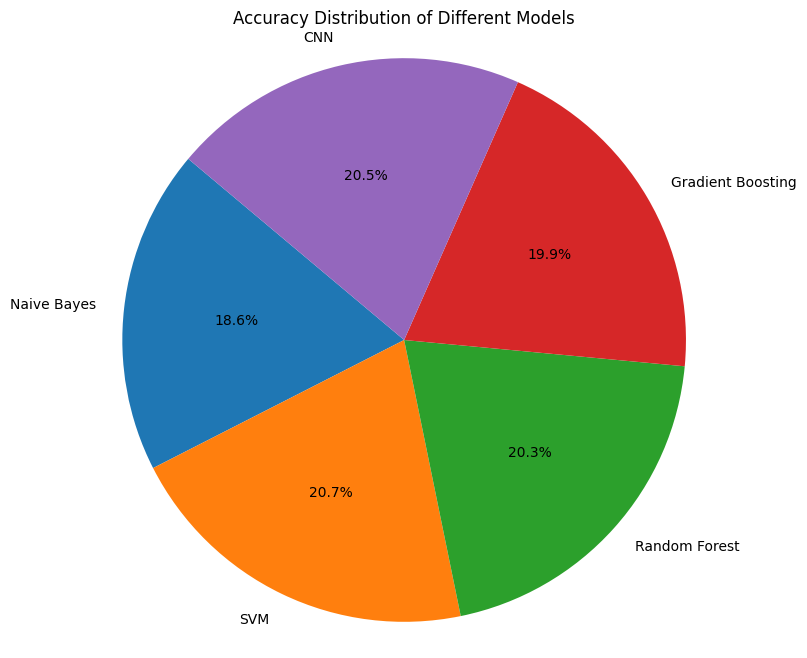

In [80]:
import matplotlib.pyplot as plt

# Model names
models = ['Naive Bayes', 'SVM', 'Random Forest', 'Gradient Boosting', 'CNN']

# Accuracy scores of the models
accuracy_scores = [89, 99, 97, 95, 98]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(accuracy_scores, labels=models, autopct='%1.1f%%', startangle=140)
plt.title('Accuracy Distribution of Different Models')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [81]:
print("Checking the models")

Checking the models


In [82]:
# Read test data from the text file
with open('test_data.txt', 'r') as file:
    test_data = file.readlines()

# Remove newline characters from the end of each line
test_data = [email.strip() for email in test_data]


NameError: name 'naive_bayes_model' is not defined